In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import pastas as ps

from matplotlib.gridspec import GridSpec

ps.set_log_level("ERROR")

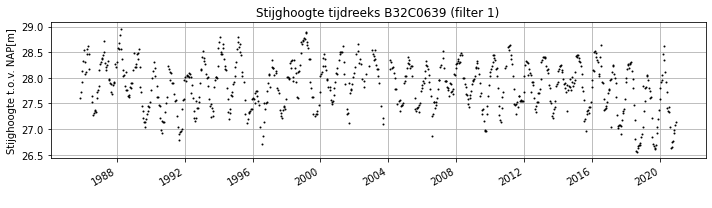

In [6]:
head = ps.read_dino("data/B58C0698001_1.csv")
head.name = "Stijghoogte B32C0639 (filter 1)"
fig, ax1 = plt.subplots(1, 1, figsize=(10,3))
head.plot(ax=ax1, marker=".", color="k", linestyle=" ", markersize=2)
ax1.grid()
ax1.set_title("Stijghoogte tijdreeks B32C0639 (filter 1)")
ax1.set_ylabel("Stijghoogte t.o.v. NAP[m]")
ax1.set_xlabel(" ");
plt.tight_layout()

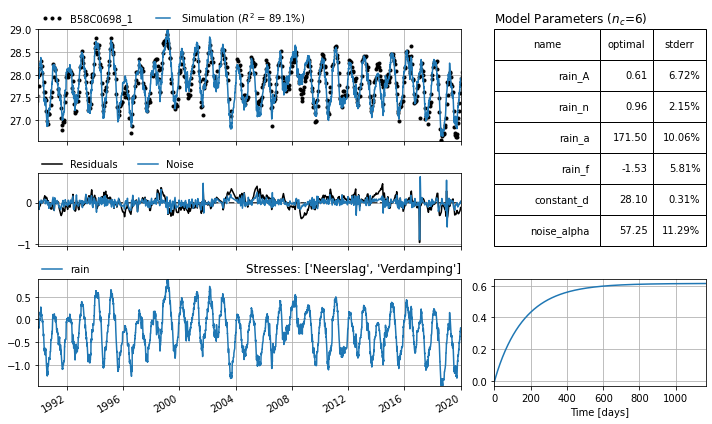

In [12]:
# Voorbeeld van neerslag en verdamping met aparte responsfuncties
evap = ps.read_knmi("data/etmgeg_380.txt", variables="EV24").series * 1e3
rain = ps.read_knmi("data/etmgeg_380.txt", variables="RH").series * 1e3
rain.name = "Neerslag"
evap.name = "Verdamping"

tmin = "1990"
tmax = "2020"

# Create the basic Pastas model
ml1 = ps.Model(head, name="2 responsen")

# Add a recharge model
sm1 = ps.RechargeModel(rain, evap, rfunc=ps.Gamma, name="rain")

ml1.add_stressmodel(sm1)

# Solve the model
ml1.solve(noise=True, tmin=tmin, tmax=tmax, report=False, fit_constant=True)
ml1.plots.results(figsize=(10, 6), adjust_height=True);
plt.tight_layout()

/Users/Raoul/Projects/pastas/pastas/pastas/stats/tests.py:616: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=0, ha="center")


[<AxesSubplot:title={'center':'Noise (n=657, $\\mu$=-0.00)'}, ylabel='Noise'>,
 <AxesSubplot:title={'center':'Autocorrelation plot'}, xlabel='Lag [Days]', ylabel='Autocorrelation [-]'>,
 <AxesSubplot:title={'center':'Histogram'}, ylabel='Probability density'>,
 <AxesSubplot:title={'center':'Probability Plot'}, xlabel='Theoretical quantiles', ylabel='Ordered Values'>]

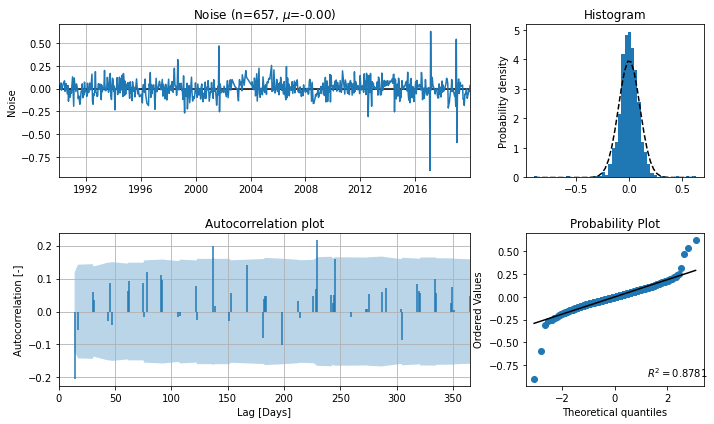

In [13]:
ml1.plots.diagnostics()